In [1]:
import pyslha #For interacting with SLHA files
import subprocess #Running command
import scipy #Numeric Library
import sympy #symbolic computation - might not be used here
from scipy import optimize
from sympy import *
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import numpy as np
%matplotlib inline
from numpy import logspace, linspace 
from itertools import product
import glob #filehandling
from subprocess import call
import os
#Path to modified verison of Softsusy 
SoftSUSY_PATH = 'softsusy-4.1.4-test/softpoint.x' 
mHiggs = 125 #Higgs Mass for paper
print ("hello")

hello


In [2]:
import os
current_path = os.getcwd()
print(current_path)

/Users/neilleonard/Repos/SoftSuzy/Neil_Plotting_Setup


In [3]:
def slhaPoint(model='FGMCaseB0', mMess=1e12, tanBeta=10, beta2=0, beta3=0, betaeps=.01, thetavev=0, 
              outputFile='test.slha', Lambda=1e6, mode='Point', LambdaGuess=6e5,particle=25):
    '''
    Code for interacting with SoftSUSY and running the models we've been looking at.
    The models themselves are encoded in a modified version of it. 
    This may seem like extra work because it accepts an arbitrary SLHA2 file, but since our models
    include fitted parameters, like the Yukawa couplings, we need to use the values that it calculates
    during the running. 
    The parameters:
    model - the name of the model in SoftSUSY
    mMess - the messenger scale
    tanBeta - tan beta
    beta2 - beta2
    beta3 - beta3
    outputFile - the name of the file to write to (this step could conceivably be removed by writing the console output to memory)
    Lambda - F/M
    mode - There are 3 modes
        'Fit' - uses Newton's method from a few different starting points
        'Bisect' - uses a Bisection routine from a few different brackets
        'Point' - runs a single point
    LambdaGuess - a guess at the value of Lambda for the 'Fit' mode.
    particle - the pdg code for the particle that we are interested in getting data for
    
    note that current implementation, fit and bisect only work for higgs, could fix, but it could only really work for
    particles with known values
    '''
    
    dataline ="./{} {} --mMess={} --LAMBDA={} --tanBeta={} --beta2={} --beta3={} --thetavev={} --betaeps={} --cgrav=1. > {}"
    startingPoints = [LambdaGuess, 1e6, 5e6, 6e4]
    bracket, l = [(2,5), (5,10), (2,10), (2,8), (4,8), (1,3), (8,12)], 0
    
    #a helper functin that takes a value of x (Lambda), runs it (line 2) and then reads in the Higgs mass
    def f(x):
        string = dataline.format(SoftSUSY_PATH, model, str(mMess), str(x), 
                                 str(tanBeta), str(beta2), str(beta3), str(thetavev), str(betaeps), outputFile)
        subprocess.Popen(string, stdout=None, shell=True).wait()
        #print ("the string is ")
        #print (string)
        return pyslha.read(outputFile).blocks['MASS'][particle]
    
    if mode == 'Fit':
        #print ('in fit')
        a, i = 0, 0
        while((a <= 0) & (i < len(startingPoints))):
            try:
                #Newton's method
                print ("in try")
                a = optimize.newton(f, startingPoints[i], tol=1e-4)
                print ("in newton")
                print (a)
            except:
                print ('got excepted')
                a = 0
                i += 1
        if (a>0):
            data = pyslha.read(outputFile)
            #accept or reject based on the deviation from the Higgs mass
            if (-0.1 < data.blocks['MASS'][25]-125 < 0.1) :
                try:
                    #if there's something in this location SoftSUSY has an error.
                    data.blocks['SPINFO'][3]
                except:
                    return data
    elif mode == 'Bisect':
        for k in bracket:
            print(k)
            try:
                l = optimize.brentq(f, k[0] * 1e5, k[1] * 1e5, rtol=1e-4)
                if l:
                    break
            except:
                #print('nada')
                continue
        if l:
            data = pyslha.read(outputFile)
            print(data.blocks['MASS'][25])
            if (-0.25 < data.blocks['MASS'][25]-125 < 0.25) :
                try:
                    data.blocks['SPINFO'][3]
                except:
                    return data
            else:
                #the bisection routine tends to get things close but not exact, so it calls 'Fit' if it's close.
                return slhaPoint(model, mMess, tanBeta, beta2, beta3,\
                              outputFile, Lambda, 'Fit', LambdaGuess=data.blocks['MINPAR'][1])
        else:
            #just to be safe (but is probably unneded)
            return slhaPoint(model, mMess, tanBeta, beta2, beta3,\
                              outputFile, Lambda, 'Fit')
    else:
        #runs a single point
        try:
            f(Lambda)
            data = pyslha.read(outputFile)
            return data.blocks['MASS'][particle], data
        except (pyslha.ParseError, RuntimeError):
            return "No Solution", 0

In [4]:
gd = slhaPoint(model='FGMCaseB1',outputFile="test3.slha",particle=2000015,beta2=10,beta3=10)

In [6]:
gd[0]

'No Solution'

In [43]:
gridBeta2 = logspace(0.0,2.0,41)
gridBeta3 = logspace(0.0,2.0,41)

resultsFGMCaseB1 = {}
k = 0
for j in product(gridBeta2, gridBeta3):
    k+=1
    print(k)
    resultsFGMCaseB1[j] = slhaPoint(model='FGMCaseB1',beta2= j[0], beta3= j[1])
print("done")    

1
2


Ignoring unknown section type: in
Ignoring unknown section type: in
Ignoring unknown section type: in
Ignoring unknown section type: in


3
4


Ignoring unknown section type: in
Ignoring unknown section type: in
Ignoring unknown section type:                                                                                                                                                                                                                                                                                                                        
Ignoring unknown section type:                                                                                                                                                                                                                                                                                                                        


5
6


Ignoring unknown section type:                                                                                                                                                                                                                                                                                                                        
Ignoring unknown section type:                                                                                                                                                                                                                                                                                                                        
Ignoring unknown section type: in
Ignoring unknown section type: in


7
8


Ignoring unknown section type: in
Ignoring unknown section type: in
Ignoring unknown section type: in
Ignoring unknown section type: in


9
10


Ignoring unknown section type: in
Ignoring unknown section type: in
Ignoring unknown section type: in
Ignoring unknown section type: in


11
12


Ignoring unknown section type: in
Ignoring unknown section type: in
Ignoring unknown section type: SM
Ignoring unknown section type: SM


13
14


Ignoring unknown section type: in
Ignoring unknown section type: in
Ignoring unknown section type: SM
Ignoring unknown section type: in
Ignoring unknown section type: in
Ignoring unknown section type: SM


15
16


Ignoring unknown section type: in
Ignoring unknown section type: in
Ignoring unknown section type: in
Ignoring unknown section type: in


17
18


Ignoring unknown section type: in
Ignoring unknown section type: in
Ignoring unknown section type: in
Ignoring unknown section type: in


19
20


Ignoring unknown section type: in
Ignoring unknown section type: in
Ignoring unknown section type: in
Ignoring unknown section type: in


21
22


Ignoring unknown section type: in
Ignoring unknown section type: in
Ignoring unknown section type: in
Ignoring unknown section type: in


23
24


Ignoring unknown section type: in
Ignoring unknown section type: in
Ignoring unknown section type: in
Ignoring unknown section type: in


25
26


Ignoring unknown section type: in
Ignoring unknown section type: in
Ignoring unknown section type: in
Ignoring unknown section type: in


27
28


Ignoring unknown section type: in
Ignoring unknown section type: in
Ignoring unknown section type: in
Ignoring unknown section type: in


29
30


Ignoring unknown section type: in
Ignoring unknown section type: in
Ignoring unknown section type: in
Ignoring unknown section type: in


31
32


Ignoring unknown section type:                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

33
34


Ignoring unknown section type: in
Ignoring unknown section type: SM
Ignoring unknown section type: in
Ignoring unknown section type: SM
Ignoring unknown section type:                                                                                                                                                                                                                                                                                                                        
Ignoring unknown section type:                                                                                                                                                                                                                                                                                                                        


35
36


Ignoring unknown section type:                                                                                                                                                                                                                                                                                                                        
Ignoring unknown section type:                                                                                                                                                                                                                                                                                                                        
Ignoring unknown section type: in


37
38


Ignoring unknown section type: SM
Ignoring unknown section type: SM


39
40


Ignoring unknown section type: in
Ignoring unknown section type: in


41
42
43
44
45
46
47
48
49
50
51
52


Ignoring unknown section type: in
Ignoring unknown section type: in


53
54
55
56
57
58
59
60
61
62


Ignoring unknown section type:                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

63
64


Ignoring unknown section type: in
Ignoring unknown section type: SM
Ignoring unknown section type: SM


65
66


Ignoring unknown section type:                                                                                                                                                                                                                                                                                                                        
Ignoring unknown section type:                                                                                                                                                                                                                                                                                                                        
Ignoring unknown section type: in
Ignoring unknown section type: S


67
68


Ignoring unknown section type: in
Ignoring unknown section type: in
Ignoring unknown section type: in


69
70
71
72
73
74
75
76
77
78


Ignoring unknown section type:                                                                                                                                                                                                                                                                                                                        
Ignoring unknown section type:                                                                                                                                                                                                                                                                                                                        
Ignoring unknown section type: in
Ignoring unknown section type: Y4.1.4
Ignoring unknown section type: in
Ignoring unknown section type: Y4.1.4


79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94


Ignoring unknown section type: SM
Ignoring unknown section type: SM
Ignoring unknown section type: SM
Ignoring unknown section type: SM


95
96


Ignoring unknown section type: SM
Ignoring unknown section type: SM
Ignoring unknown section type: in
Ignoring unknown section type: in


97
98


Ignoring unknown section type: in
Ignoring unknown section type: in
Ignoring unknown section type: in
Ignoring unknown section type: SM
Ignoring unknown section type: in
Ignoring unknown section type: SM


99
100


Ignoring unknown section type:                                                                                                                                                                                                                                                                                                                        
Ignoring unknown section type:                                                                                                                                                                                                                                                                                                                        
Ignoring unknown section type: in
Ignoring unknown section type: in


101
102


Ignoring unknown section type: in
Ignoring unknown section type: in
Ignoring unknown section type: in
Ignoring unknown section type: in


103
104


Ignoring unknown section type: in
Ignoring unknown section type: in


105


Ignoring unknown section type: in
Ignoring unknown section type: in
Ignoring unknown section type: in
Ignoring unknown section type: SM
Ignoring unknown section type: in
Ignoring unknown section type: SM


106
107


Ignoring unknown section type:                                                                                                                                                                                                                                                                                                                        
Ignoring unknown section type:                                                                                                                                                                                                                                                                                                                        
Ignoring unknown section type: in
Ignoring unknown section type: in


108
109
110
111


Ignoring unknown section type: in
Ignoring unknown section type: in
Ignoring unknown section type: in
Ignoring unknown section type: in
Ignoring unknown section type: in
Ignoring unknown section type: in


112
113


Ignoring unknown section type: in
Ignoring unknown section type:                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

114
115
116


Ignoring unknown section type:                                                                                                                                                                                                                                                                                                                        
Ignoring unknown section type:                                                                                                                                                                                                                                                                                                                        
Ignoring unknown section type: in


AccessError: Tried to set a unique value on a multi-value block MSOFT

plotData is
zm, then zn, then z0
[[126.002791 126.009811 126.033183 ... -- -- --]
 [126.007014 126.014108 126.037693 ... -- -- --]
 [126.020766 126.028076 126.05235 ... -- -- --]
 ...
 [-- 126.979846 -- ... -- -- --]
 [126.968011 126.98042 -- ... -- -- --]
 [126.968217 126.980619 -- ... -- -- --]]
zn
[[9274.2324 9497.99195 9740.69283 ... -- -- --]
 [9281.16979 9503.38983 9744.65785 ... -- -- --]
 [9303.45128 9520.73699 9757.40475 ... -- -- --]
 ...
 [-- 10313.8552 -- ... -- -- --]
 [10308.7586 10314.0253 -- ... -- -- --]
 [10308.9096 10314.1419 -- ... -- -- --]]
z0
[[2450.51253 2472.58957 2507.61901 ... -- -- --]
 [2452.65916 2474.78545 2510.00909 ... -- -- --]
 [2459.54804 2481.83658 2517.6804 ... -- -- --]
 ...
 [-- 2798.64776 -- ... -- -- --]
 [2769.5883 2798.71373 -- ... -- -- --]
 [2769.63401 2798.75728 -- ... -- -- --]]


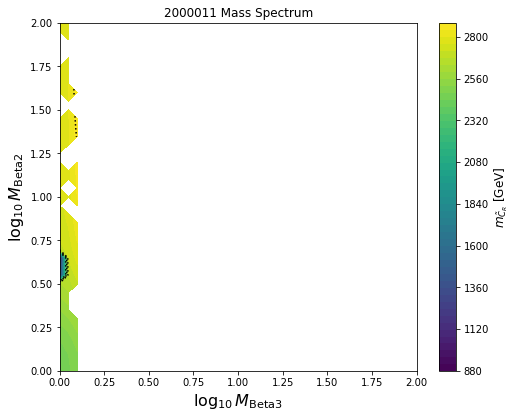

In [44]:
file = resultsFGMCaseB1
plotData, plotData2, plotData3 = [], [], []
for i in gridBeta2:
    row, row2, row3 = [], [], []
    for j in gridBeta3:
        try:
            row.append(file[(j,i)][1].blocks['MASS'][25])
            row2.append(file[(j,i)][1].blocks['MASS'][2000002])
            row3.append(file[(j,i)][1].blocks['MASS'][2000011])
            #row.append(resultsB1mMessLambda40[(j,i)][1].blocks['MINPAR'][1])
        except:
            row.append(0)
            row2.append(0)
            row3.append(0)
            #print((j,i))
    plotData.append(row)
    plotData2.append(row2)
    plotData3.append(row3)
plotData = np.array(plotData)
plotData2 = np.array(plotData2)
plotData3 = np.array(plotData3)
print("plotData is")
#print(plotData)

Zm = np.ma.masked_where(plotData < 1.2, plotData)
Zn = np.ma.masked_where(plotData2 < 1.2, plotData2)
Zo = np.ma.masked_where(plotData3 < 1.2, plotData3)
print("zm, then zn, then z0")
print(Zm)
print("zn")
print(Zn)
print('z0')
print(Zo)

fig, ax = plt.subplots( figsize=(8, 6.4))

im = ax.contourf(np.log10(gridBeta3), np.log10(gridBeta2), Zo,50)
plt.xlabel(r'$\log_{10}\, M_{\rm{Beta3}}$',fontsize=16)
plt.ylabel(r'$\log_{10}\,M_{\rm{Beta2}}$',fontsize=16)
cbar = fig.colorbar(im)
cbar.set_label(r'$m_{\tilde C_{R}}$ [GeV]', size=12)
cs = ax.contour(np.log10(gridBeta3), np.log10(gridBeta2), Zm, [124,125,126,127,128],colors='k',linestyles='dotted')
ax.clabel(cs, fontsize=16, inline=1, colors='w',fmt="%1.2f")
#cs = ax.contour(np.log10(gridBeta3), np.log10(gridBeta2), Zn, [12000,12100,12200,12300],colors='k',linestyles='dotted')
#ax.clabel(cs, fontsize=16, inline=1, colors='w',fmt="%1.1f")
#cs = ax.contour(np.log10(gridBeta3), np.log10(gridBeta2), Zo, [4600],colors='k',linestyles='dotted')
#ax.clabel(cs, fontsize=16, inline=1, colors='w',fmt="%1.f")
plt.title("2000011 Mass Spectrum")
plt.savefig("b3b2eR.pdf")
